In [18]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

plt.ion()
plt.rcParams['figure.figsize'] = 10, 8

In [19]:
# generally, ODE's have the form
# y' = f(x, y)

In [20]:
P = 0      # birth rate
d = 0.0001  # natural death percent (per day)
B = 0.0095  # transmission percent  (per day)
G = 0.0001  # resurect percent (per day)
A = 0.0001  # destroy percent  (per day)

In [21]:
# solve the system dy/dt = f(y, t)
def f(y, t):
    # Si = y[0]
    # Zi = y[1]
    # Ri = y[2]
    Si, Zi, Ri = tuple(y)
    # the model equations (see Munz et al. 2009)
    # dS/dt = P - BSZ - dS
    # dZ/dt = BSZ + GR - ASZ
    # dR/dt = dS + ASZ - GR
    f0 = P - B*Si*Zi - d*Si
    f1 = B*Si*Zi + G*Ri - A*Si*Zi
    f2 = d*Si + A*Si*Zi - G*Ri
    return np.array([f0, f1, f2])

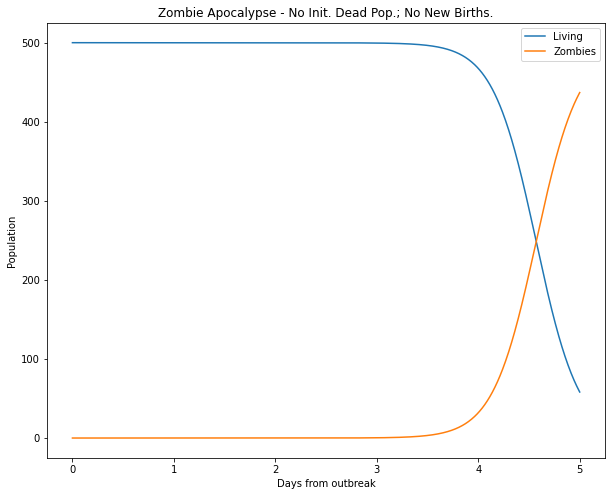

In [22]:
# initial conditions
S0 = 500.              # initial population
Z0 = 0                 # initial zombie population
R0 = 0                 # initial death population
y0 = np.array([S0, Z0, R0]) # initial condition vector
t  = np.linspace(0, 5., 1000) # time grid

# solve the DEs
soln = odeint(f, y0, t)
S = soln[:, 0]
Z = soln[:, 1]
R = soln[:, 2]

# plot results
plt.figure()
plt.plot(t, S, label='Living')
plt.plot(t, Z, label='Zombies')
plt.xlabel('Days from outbreak')
plt.ylabel('Population')
plt.title('Zombie Apocalypse - No Init. Dead Pop.; No New Births.')
plt.legend(loc=0)
plt.show()

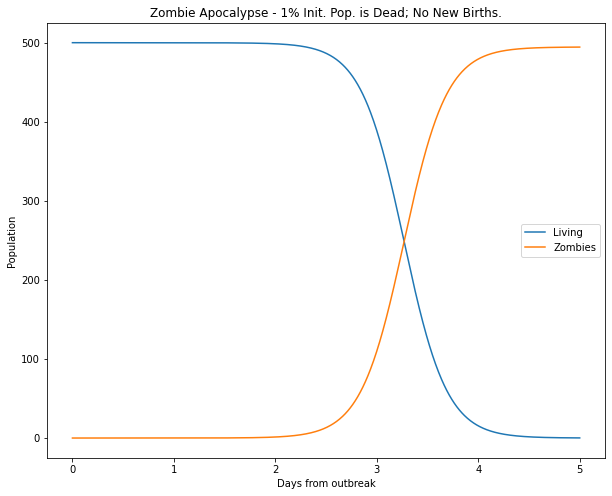

In [23]:
# change the initial conditions
R0 = 0.01*S0   # 1% of initial pop is dead
y0 = np.array([S0, Z0, R0])

# solve the DEs
soln = odeint(f, y0, t)
S = soln[:, 0]
Z = soln[:, 1]
R = soln[:, 2]

# plot results
plt.figure()
plt.plot(t, S, label='Living')
plt.plot(t, Z, label='Zombies')
plt.xlabel('Days from outbreak')
plt.ylabel('Population')
plt.title('Zombie Apocalypse - 1% Init. Pop. is Dead; No New Births.')
plt.legend(loc=0)
plt.show()

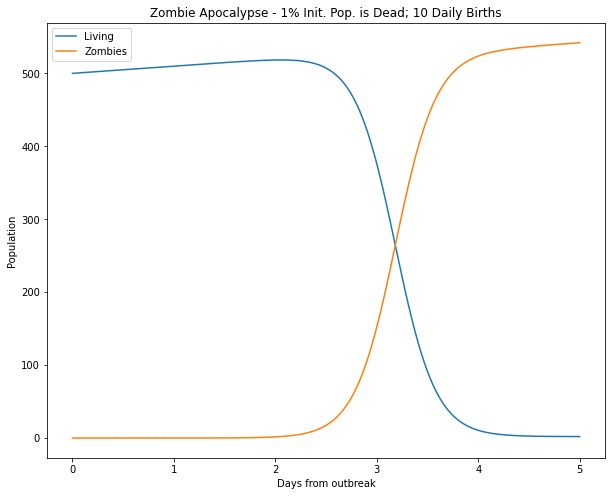

In [24]:
# change the initial conditions
R0 = 0.01*S0   # 1% of initial pop is dead
P  = 10        # 10 new births daily
y0 = np.array([S0, Z0, R0])

# solve the DEs
soln = odeint(f, y0, t)
S = soln[:, 0]
Z = soln[:, 1]
R = soln[:, 2]

plt.figure()
plt.plot(t, S, label='Living')
plt.plot(t, Z, label='Zombies')
plt.xlabel('Days from outbreak')
plt.ylabel('Population')
plt.title('Zombie Apocalypse - 1% Init. Pop. is Dead; 10 Daily Births')
plt.legend(loc=0)
plt.show()